I will be working on a multi-class classification problem. 
I will be using my own dataset which contains Resume/invoices/form.




**Download and Prepare the Datasett**

In [ ]:
import os

base_dir='..'

invoice_dir = os.path.join(base_dir, 'invoice')
resume_dir = os.path.join(base_dir, 'resume')
form_dir = os.path.join(base_dir, 'form')
print('total training documents:', int(len(os.listdir(invoice_dir)) + int(len(os.listdir(resume_dir)))+ int(len(os.listdir(form_dir)))))
print('total training invoice images:', len(os.listdir(invoice_dir)))
print('total training resume images:', len(os.listdir(resume_dir)))
print('total training other images:', len(os.listdir(form_dir)))

invoice_files = os.listdir(invoice_dir)
print(invoice_files[:10])

resume_files = os.listdir(resume_dir)
print(resume_files[:10])

form_files = os.listdir(form_dir)
print(form_files[:10])


total training documents: 1594
total training invoice images: 600
total training resume images: 440
total training other images: 554
['0060082098.jpg', '01398469.jpg', '0001233629.jpg', '0011929750.jpg', '0013041942.jpg', '03750991.jpg', '03638969.jpg', '00621985.jpg', '0060027381.jpg', '0060281129.jpg']
['10117818_10117821.jpg', '2080731650_1652.jpg', '2015049025.jpg', '0000790115.jpg', '2015056568_2015056584.jpg', '2025638138_2025638142.jpg', '2057831842_2057831853.jpg', '2044462673.jpg', '2021635122.jpg', '2051827641_2051827642.jpg']
['2072822511_2512.jpg', '2076727418.jpg', '2026000296.jpg', '2022925192.jpg', '2074657875.jpg', '2064847064.jpg', '2051062626_2051062630.jpg', '2058144620.jpg', '2061669019.jpg', '2022916255.jpg']


Inspect some of the images to see the variety in your model inputs.

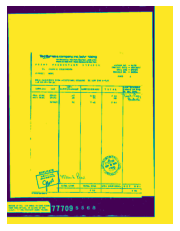

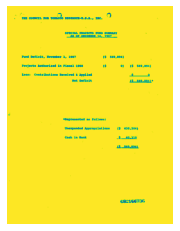

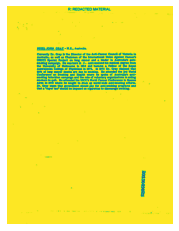

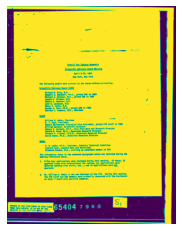

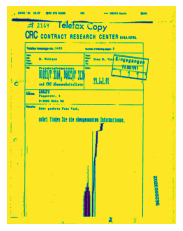

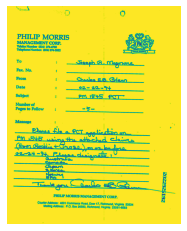

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 4

next_invoice = [os.path.join(invoice_dir, fname) 
                for fname in invoice_files[pic_index-2:pic_index]]
next_resume = [os.path.join(resume_dir, fname) 
                for fname in resume_files[pic_index-2:pic_index]]
next_form = [os.path.join(form_dir, fname) 
                for fname in form_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_invoice+next_resume+next_form):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

Build the model

Building a CNN model.

    4 convolution layers with 64-64-128-128 filters.
    Dropout layer to avoid overfitting and some Dense layers for the classification.
    The output layer would be a 3-neuron dense layer activated by Softmax.
    It scales your output to a set of probabilities that add up to 1. 
    The order of this 3-neuron output would be resume-invoice-form (e.g. a [0.8 0.2 0.0] output means the model is prediciting 80% probability for resume and 20% probability for rock.



In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    #tf.keras.layers.Dropout(0.5),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

**Compile the Model**

change the loss function.

before we were using binary_crossentropy for 2 classes, now we change it to categorical_crossentropy to extend it to more classes.


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Prepare the ImageDataGenerator

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = ".."
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      #changement
	    rotation_range=15,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = ".."
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 1577 images belonging to 3 classes.
Found 387 images belonging to 3 classes.


**Train the model**

In [ ]:
history = model.fit(train_generator, 
                    epochs=20, 
                    steps_per_epoch=13, 
                    validation_data = validation_generator,
                    verbose = 1, 
                    validation_steps=3
)

Epoch 1/20
13/13 [==============================] - 338s 25s/step - loss: 1.6745 - accuracy: 0.3557 - val_loss: 1.0929 - val_accuracy: 0.3598
Epoch 2/20
13/13 [==============================] - 20s 2s/step - loss: 1.2095 - accuracy: 0.4071 - val_loss: 1.1568 - val_accuracy: 0.3783
Epoch 3/20
13/13 [==============================] - 20s 2s/step - loss: 1.1031 - accuracy: 0.3760 - val_loss: 1.0794 - val_accuracy: 0.3968
Epoch 4/20
13/13 [==============================] - 20s 2s/step - loss: 1.0865 - accuracy: 0.3811 - val_loss: 1.0889 - val_accuracy: 0.3624
Epoch 5/20
13/13 [==============================] - 20s 2s/step - loss: 1.0820 - accuracy: 0.4008 - val_loss: 1.1078 - val_accuracy: 0.3651
Epoch 6/20
13/13 [==============================] - 20s 2s/step - loss: 1.0852 - accuracy: 0.4141 - val_loss: 1.0882 - val_accuracy: 0.3651
Epoch 7/20
13/13 [==============================] - 20s 2s/step - loss: 1.0761 - accuracy: 0.3944 - val_loss: 1.2030 - val_accuracy: 0.3042
Epoch 8/20
13/13 [

**Model Prediction**

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving cv test.png to cv test.png
cv test.png
[[0. 1. 0.]]
